## Load the metrics and filter results

We start of with the L1, L2 experiments

In [23]:
import pandas as pd

l1l2_metrics=pd.read_csv('evaluation_results_L1L2.csv')
l1l2_metrics

Category     Metric      Value  \
0                     art_work  avg LPIPS   0.791585   
1                   land_scape  avg LPIPS   0.772284   
2           building_city_view  avg LPIPS   0.789801   
3    building_countryside_view  avg LPIPS   0.809297   
4                      animals  avg LPIPS   0.770892   
..                         ...        ...        ...   
235                 human_head     avg MD  32.705193   
236           human_upper_body     avg MD  32.804955   
237            human_full_body     avg MD  26.090868   
238            interior_design     avg MD  21.904811   
239              other_objects     avg MD  39.475667   

                                             Eval_Root  
0    ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
1    ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
2    ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
3    ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
4    ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
..                                                 ...  
235  ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
236  ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
237  ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
238  ../L1_L2_experiments/drag_diffusion_res_80_0.7...  
239  ../L1_L2_experiments/drag_diffusion_res_80_0.7...  

[240 rows x 4 columns]

Change the eval_root strings into something more readable focusing on the L1 and L2 combinations

In [24]:
import re

# Function to process the string
def process_string(string):
    # Find all occurrences of L1m, L1p, L1mask with their values
    matches = re.findall(r'(L1\w+)=([^_]+)', string)
    result = []
    for key, value in matches:
        # If the value is False, replace L1 with L2
        if value == 'False':
            result.append(key.replace('L1', 'L2'))
        else:
            result.append(key)
    return ' '.join(result)

# Apply the function to the column
l1l2_metrics['Eval_Root'] = l1l2_metrics['Eval_Root'].apply(process_string)

print(l1l2_metrics)

                      Category     Metric      Value       Eval_Root
0                     art_work  avg LPIPS   0.791585  L2m L2p L2mask
1                   land_scape  avg LPIPS   0.772284  L2m L2p L2mask
2           building_city_view  avg LPIPS   0.789801  L2m L2p L2mask
3    building_countryside_view  avg LPIPS   0.809297  L2m L2p L2mask
4                      animals  avg LPIPS   0.770892  L2m L2p L2mask
..                         ...        ...        ...             ...
235                 human_head     avg MD  32.705193  L1m L1p L1mask
236           human_upper_body     avg MD  32.804955  L1m L1p L1mask
237            human_full_body     avg MD  26.090868  L1m L1p L1mask
238            interior_design     avg MD  21.904811  L1m L1p L1mask
239              other_objects     avg MD  39.475667  L1m L1p L1mask

[240 rows x 4 columns]


### Generate overviews of the L1 and L2 experiments

In [25]:
l1l2_metrics_pivot = l1l2_metrics.pivot_table(
    index=["Category", "Metric"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Eval_Root"           # Turn 'Eval_Root' into columns
).sort_values(by='Metric').reset_index()

l1l2_metrics_pivot.to_csv('evaluation_l1l2_grid.csv', index=False)
l1l2_metrics_pivot

Eval_Root                   Category               Metric  L1m L1p L1mask  \
0                            animals  avg CLIP similarity        0.979492   
1                   human_upper_body  avg CLIP similarity        0.974121   
2                         human_head  avg CLIP similarity        0.972168   
3                    human_full_body  avg CLIP similarity        0.985840   
4                         land_scape  avg CLIP similarity        0.978027   
5          building_countryside_view  avg CLIP similarity        0.977051   
6                    interior_design  avg CLIP similarity        0.982910   
7                           art_work  avg CLIP similarity        0.974121   
8                      other_objects  avg CLIP similarity        0.980957   
9                 building_city_view  avg CLIP similarity        0.973145   
10                building_city_view            avg LPIPS        0.889342   
11                        land_scape            avg LPIPS        0.874634   
12                   interior_design            avg LPIPS        0.898297   
13                          art_work            avg LPIPS        0.885504   
14                   human_full_body            avg LPIPS        0.961084   
15                     other_objects            avg LPIPS        0.870936   
16                        human_head            avg LPIPS        0.837894   
17                           animals            avg LPIPS        0.867678   
18                  human_upper_body            avg LPIPS        0.886310   
19         building_countryside_view            avg LPIPS        0.883705   
20                        land_scape               avg MD       39.531832   
21                   interior_design               avg MD       21.904811   
22                   human_full_body               avg MD       26.090868   
23                        human_head               avg MD       32.705193   
24         building_countryside_view               avg MD       51.599574   
25                building_city_view               avg MD       33.133202   
26                          art_work               avg MD       30.297707   
27                           animals               avg MD       32.039485   
28                  human_upper_body               avg MD       32.804955   
29                     other_objects               avg MD       39.475667   

Eval_Root  L1m L1p L2mask  L1m L2p L1mask  L1m L2p L2mask  L2m L1p L1mask  \
0                0.968750        0.979980        0.969238        0.979492   
1                0.968750        0.974121        0.968262        0.973633   
2                0.964844        0.973145        0.944824        0.974609   
3                0.969727        0.984863        0.960938        0.984375   
4                0.966797        0.979492        0.962891        0.979004   
5                0.958984        0.977539        0.966309        0.977051   
6                0.974609        0.983398        0.975586        0.983887   
7                0.963867        0.973633        0.961914        0.973145   
8                0.967773        0.978027        0.967285        0.979980   
9                0.947754        0.973145        0.950195        0.969727   
10               0.789465        0.884330        0.782908        0.884503   
11               0.780263        0.877653        0.749996        0.880042   
12               0.791428        0.900208        0.800772        0.902564   
13               0.789276        0.879648        0.793574        0.881210   
14               0.870678        0.959079        0.864540        0.949091   
15               0.811088        0.867737        0.795893        0.870849   
16               0.776724        0.838728        0.753330        0.854707   
17               0.772236        0.869180        0.782609        0.866403   
18               0.799948        0.889906        0.805185        0.889700   
19               0.808209        0.880424        0.821151        0.89040

## Helper functions created by Dietmar

In [87]:
# Highlight min and max values for columns
def highlight_min_max_columns(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return [
        'background-color: darkblue' if v else
        'background-color: darkgreen' if w else
        ''
        for v, w in zip(is_max, is_min)
    ]

# Highlight min and max values for rows starting from column index 3
def highlight_min_max_rows(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    for idx in range(len(df)):  # Use range to iterate over row indices
        row = df.iloc[idx, 2:]  # Only numeric columns starting from index 2
        is_max = row == row.max()
        is_min = row == row.min()
        styles.iloc[idx, 2:] = [
            'background-color: darkblue' if v else
            'background-color: darkgreen' if w else
            ''
            for v, w in zip(is_max, is_min)
        ]
    return styles

In [91]:
# # Select a metric
l1l2_metrics_select= l1l2_metrics_pivot[l1l2_metrics_pivot['Metric']=='avg LPIPS']

In [92]:


# Apply styling to the selected dataframe
numeric_columns = l1l2_metrics_select.columns[2:]  # Get the column names starting from index 3
styled = l1l2_metrics_select.style.apply(highlight_min_max_columns, subset=numeric_columns, axis=0)

#styled = l1l2_metrics_select.style.apply(highlight_min_max_columns,  axis=0)

styled

In [93]:

styled1 = l1l2_metrics_select.style.apply(lambda _: highlight_min_max_rows(l1l2_metrics_select), axis=None)

# Display in Jupyter Notebook
styled1

In [12]:
# average values for each experiment
l1l2_metrics_pivot2 = l1l2_metrics.pivot_table(
    index=["Eval_Root"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Metric"           # Turn 'Eval_Root' into columns
).reset_index()
l1l2_metrics_pivot2

Metric       Eval_Root  avg CLIP similarity  avg LPIPS     avg MD
0       L1m L1p L1mask             0.977783   0.885538  33.958329
1       L1m L1p L2mask             0.965186   0.798932  34.650719
2       L1m L2p L1mask             0.977734   0.884689  31.680803
3       L1m L2p L2mask             0.962744   0.794996  33.433627
4       L2m L1p L1mask             0.977490   0.886947  33.200948
5       L2m L1p L2mask             0.966260   0.802291  33.946231
6       L2m L2p L1mask             0.976416   0.885981  35.060093
7       L2m L2p L2mask             0.966895   0.798918  34.888964

### Generate overviews of the FreeDrag versus DragDiffusion experiments

In [16]:
import pandas as pd

freedrag_metrics=pd.read_csv('evaluation_results_freedrag.csv')

# Update the eval_root column based on the condition
freedrag_metrics['Eval_Root'] = freedrag_metrics['Eval_Root'].apply(lambda x: 'freedrag' if 'freedrag_diffusion' in x.lower() else 'dragdiffusion')

# average values for each experiment
freedrag_metrics_pivot = freedrag_metrics.pivot_table(
    index=["Eval_Root","Category"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Metric"           # Turn 'Eval_Root' into columns
).sort_values(by=["Category","Eval_Root"]).reset_index()
freedrag_metrics_pivot

Metric      Eval_Root                   Category  avg CLIP similarity  \
0       dragdiffusion                    animals             0.977051   
1            freedrag                    animals             0.983887   
2       dragdiffusion                   art_work             0.970703   
3            freedrag                   art_work             0.974609   
4       dragdiffusion         building_city_view             0.968750   
5            freedrag         building_city_view             0.974121   
6       dragdiffusion  building_countryside_view             0.976074   
7            freedrag  building_countryside_view             0.975098   
8       dragdiffusion            human_full_body             0.986816   
9            freedrag            human_full_body             0.982422   
10      dragdiffusion                 human_head             0.971191   
11           freedrag                 human_head             0.974609   
12      dragdiffusion           human_upper_body             0.970703   
13           freedrag           human_upper_body             0.978027   
14      dragdiffusion            interior_design             0.979492   
15           freedrag            interior_design             0.984863   
16      dragdiffusion                 land_scape             0.971191   
17           freedrag                 land_scape             0.975586   
18      dragdiffusion              other_objects             0.974121   
19           freedrag              other_objects             0.978027   

Metric  avg LPIPS     avg MD  
0        0.846330  42.240814  
1        0.910129  36.080838  
2        0.867658  35.603590  
3        0.886668  29.217703  
4        0.865629  40.891561  
5        0.899050  24.443809  
6        0.872661  43.983330  
7        0.895025  41.827147  
8        0.956523  33.082960  
9        0.954483  28.402578  
10       0.830569  34.606361  
11       0.892425  44.689821  
12       0.876062  35.043242  
13       0.903090  35.100226  
14       0.882101  18.842781  
15       0.906886  22.857164  
16       0.851874  36.493869  
17       0.866476  25.563522  
18       0.848683  32.254876  
19       0.892100  37.243877

### Retrieve dragged images compared to the originals

Processing category: human_full_body
{'Original': ['../drag_bench_data\\human_full_body\\SY_2023-09-15-1923-29\\user_drag.png', '../drag_bench_data\\human_full_body\\SY_2023-09-15-1924-45\\user_drag.png', '../drag_bench_data\\human_full_body\\SY_2023-09-15-1925-32\\user_drag.png'], 'DragDiffusion': ['../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\human_full_body\\SY_2023-09-15-1923-29\\dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\human_full_body\\SY_2023-09-15-1924-45\\dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\human_full_body\\SY_2023-09-15-1925-32\\dragged_image.png'], 'FreeDrag': ['../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0\\human_full_body\\SY_2023-09-15-1923-29\\dragged_image.png', '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0\\human_full_body\\SY_2023-09-15-1924-4

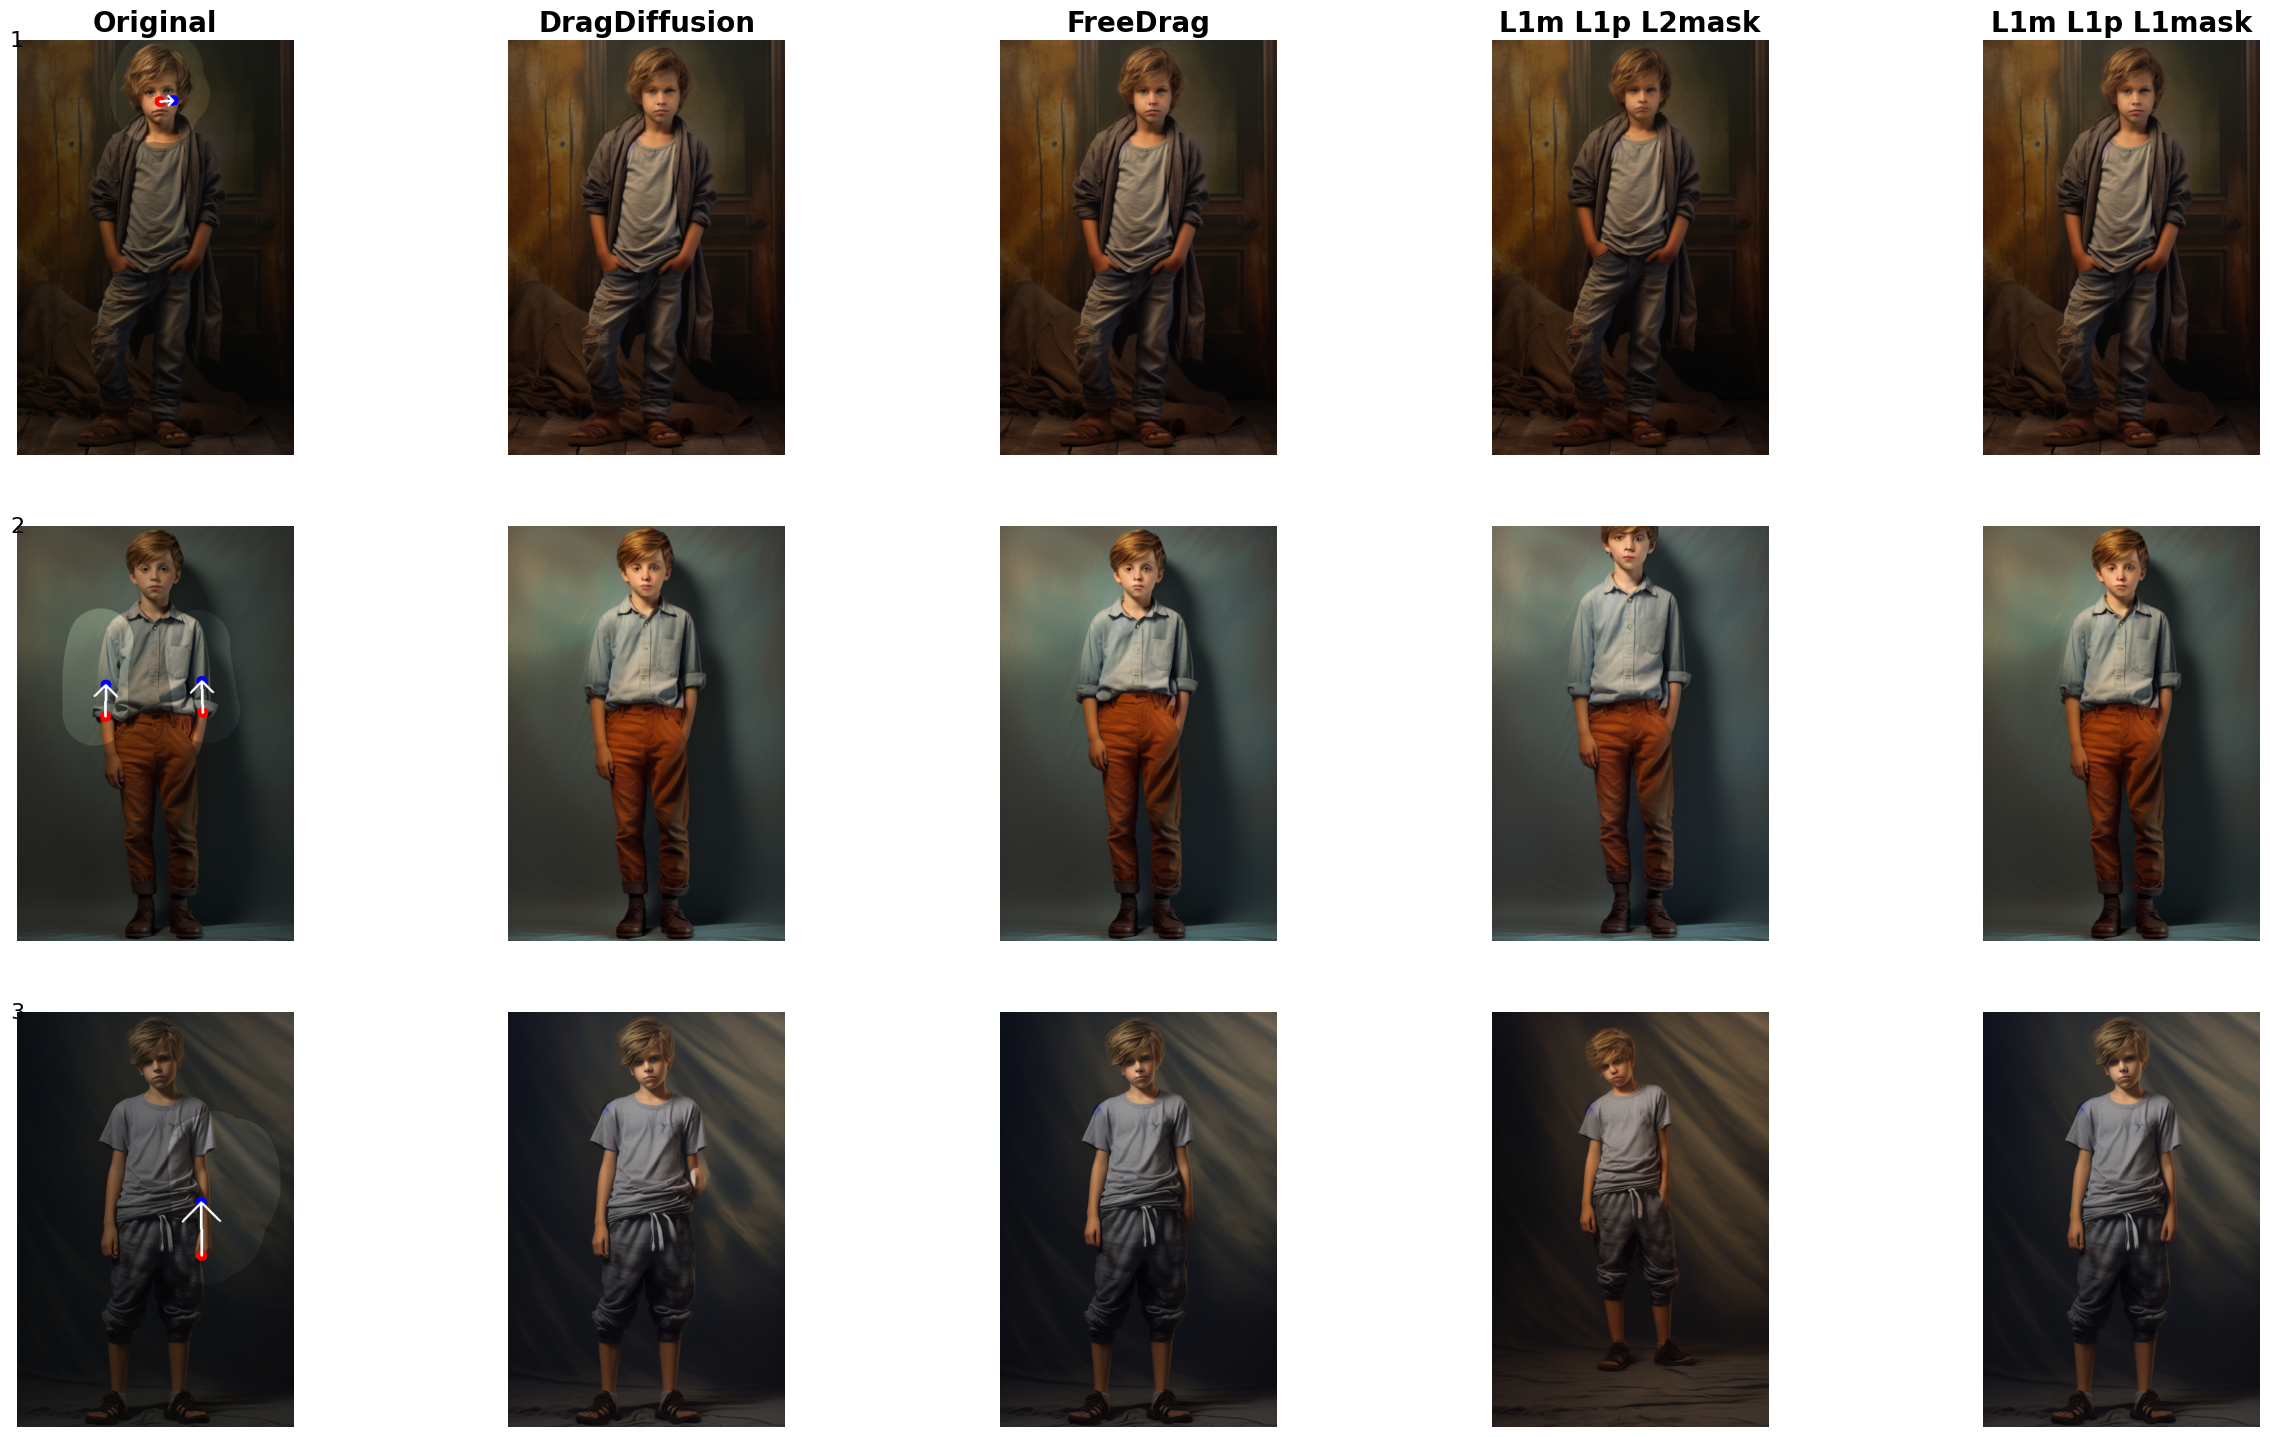

Processing category: interior_design
{'Original': ['../drag_bench_data\\interior_design\\SY_2023-09-15-1621-49\\user_drag.png', '../drag_bench_data\\interior_design\\SY_2023-09-15-1627-31\\user_drag.png', '../drag_bench_data\\interior_design\\SY_2023-09-15-1629-37\\user_drag.png'], 'DragDiffusion': ['../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\interior_design\\SY_2023-09-15-1621-49\\dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\interior_design\\SY_2023-09-15-1627-31\\dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300\\interior_design\\SY_2023-09-15-1629-37\\dragged_image.png'], 'FreeDrag': ['../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0\\interior_design\\SY_2023-09-15-1621-49\\dragged_image.png', '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0\\interior_design\\SY_2023-09-15-1627-3

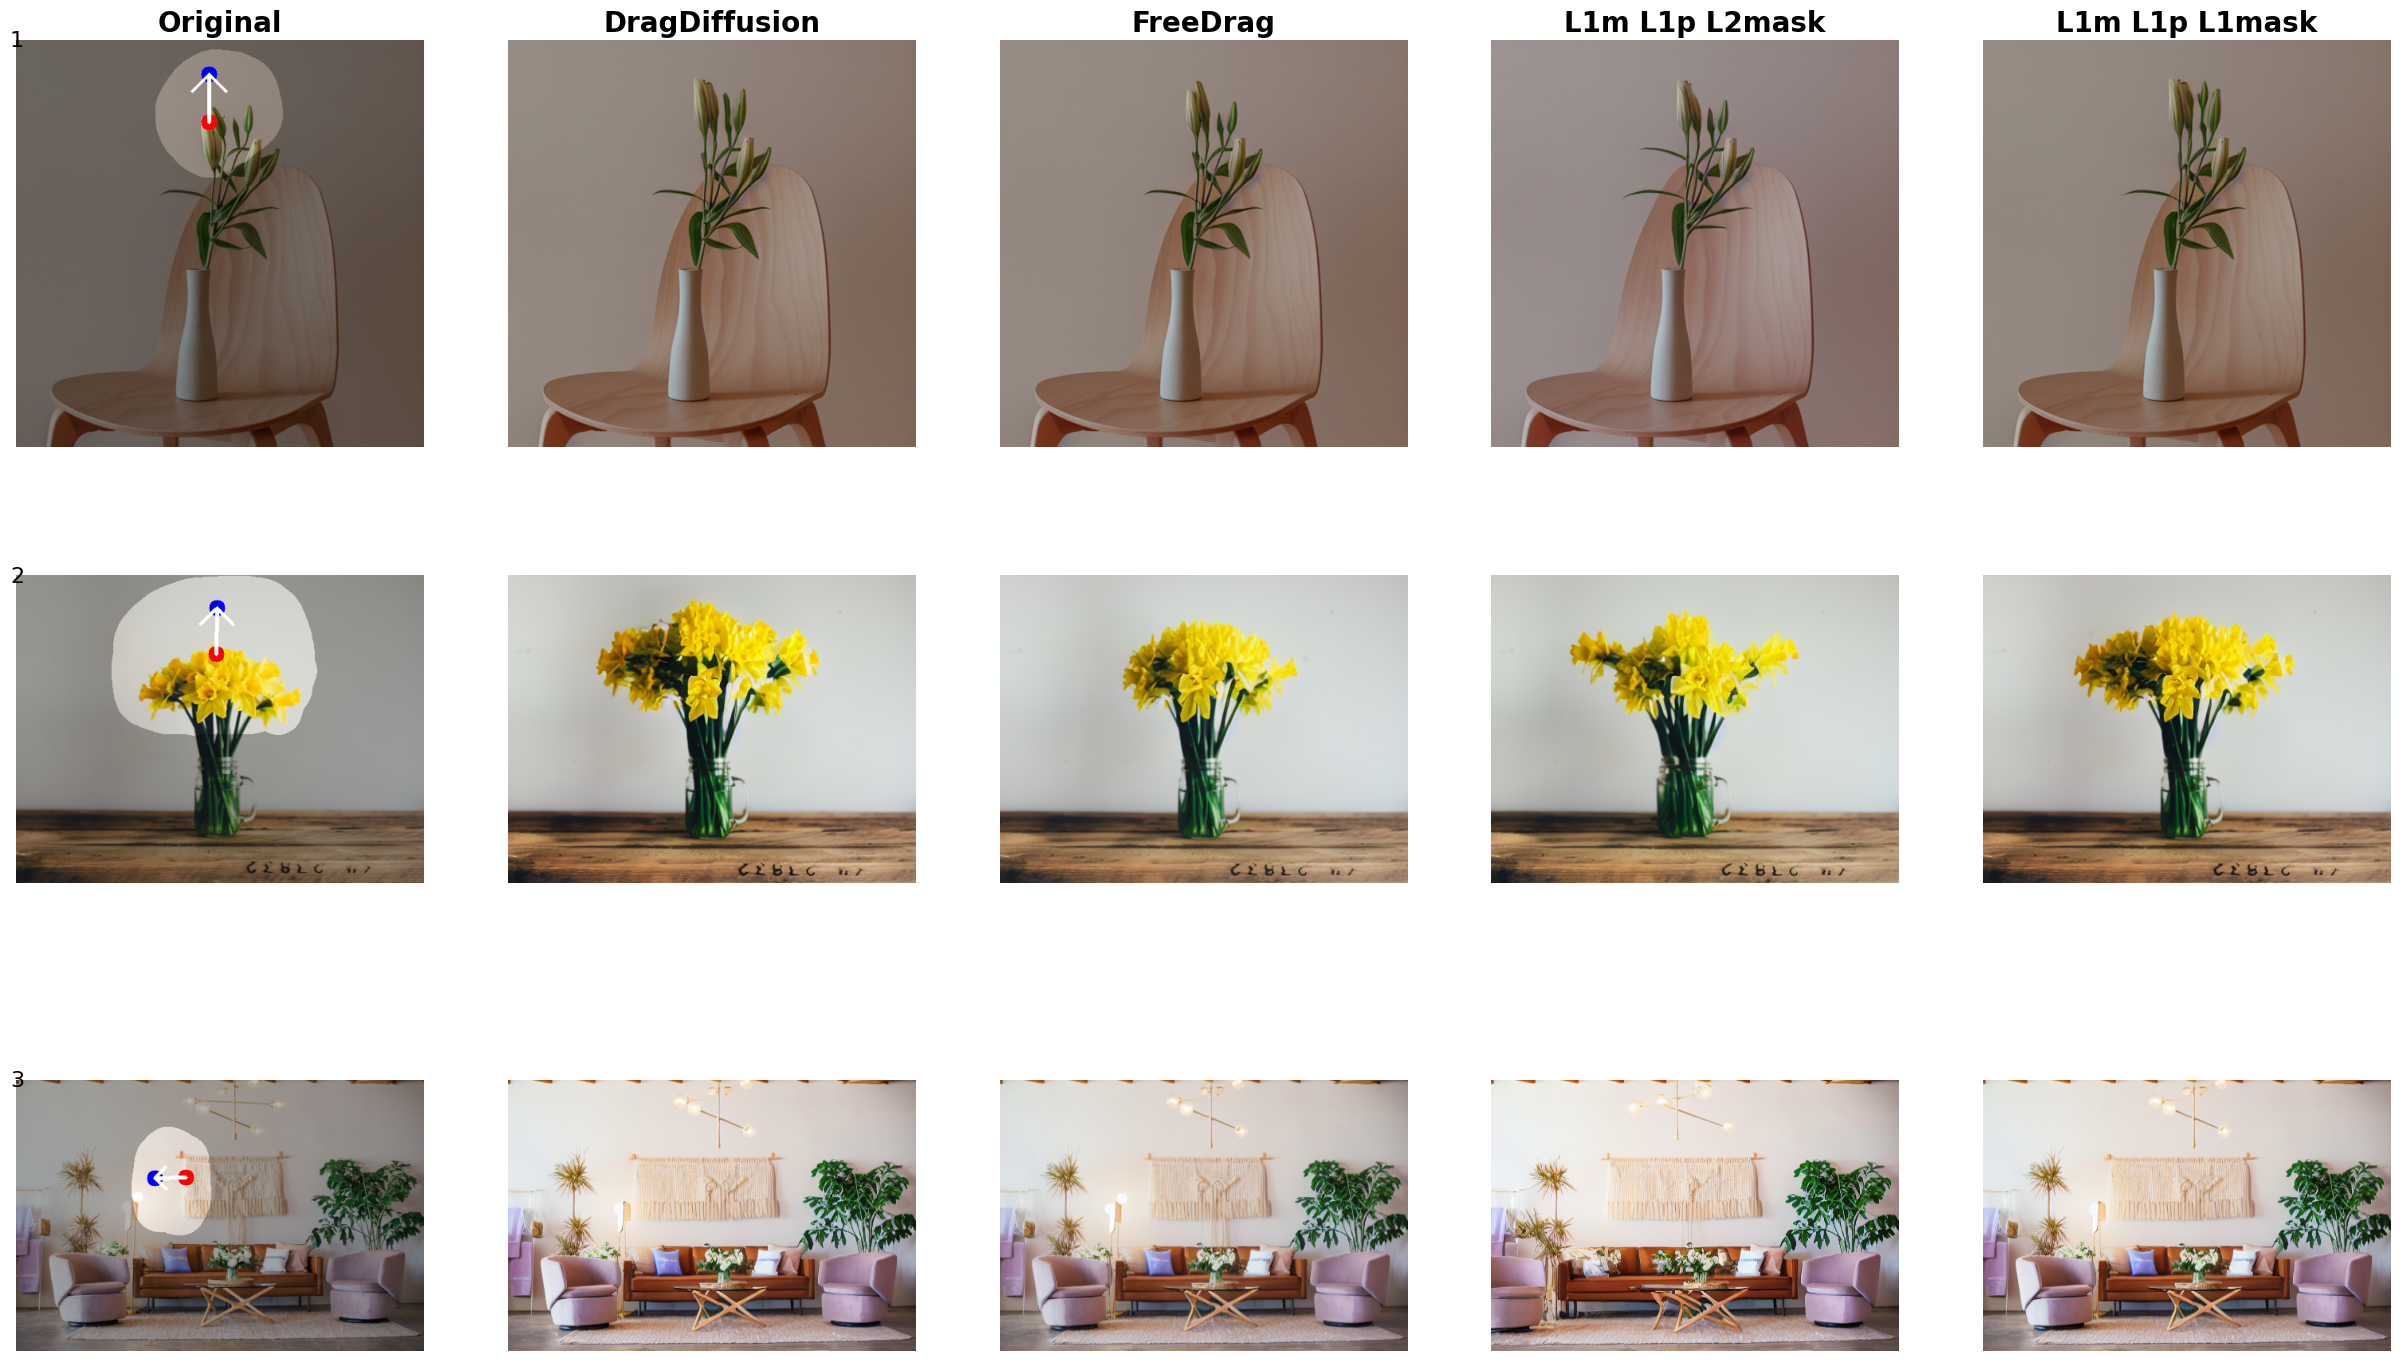

In [19]:
import showImages
import os

# Select which root folder paths to include
root_folders = [
    '../drag_bench_data',
    '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300',
    '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=True',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=True',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=True',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=True'
]

# Directory to save the result images
output_dir = "img"
os.makedirs(output_dir, exist_ok=True)

# Select the categories to include
all_categories = [
   # 'art_work',
   # 'land_scape',
   # 'building_city_view',
   # 'building_countryside_view',
   # 'animals',
   # 'human_head',
   # 'human_upper_body',
    'human_full_body',
    'interior_design',
   # 'other_objects',
]

#  Select which rows of images to include in the output as a list for example imageList=[1,5,7] 
#  Or use imageList=None to retrieve all
imageList=[1,2,3]

for category in all_categories:
    print(f"Processing category: {category}")

    # Load images for the current category
    images_dict = showImages.load_images_from_roots(root_folders, category, imageList)
    print(images_dict)

    # Save the grid as a jpg file
    save_path = os.path.join(output_dir, f"{category}.png")
    showImages.display_images_in_grid(images_dict, save_path=save_path)